# Chapter 8 - Tree-based Methods

In [11]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydotplus
from IPython.display import Image

#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

pd.set_option('display.notebook_repr_html', True)

# make matplotlib graphics to show up inline
%matplotlib inline  
plt.style.use('seaborn-white')

/Users/Beatrice1/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [12]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

### 8.1.1 Regression Trees in Chapter 8

In R, exported the dataset from package 'ISLR' to a csv file.

In [13]:
df = pd.read_csv('Data/Hitters.csv').dropna()
#df.info()
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [14]:
X = df[['Years', 'Hits']].values  # Convert the frame to its Numpy-array representation.
y = np.log(df.Salary.values)

In [15]:
df[['Years', 'Hits']].values

array([[ 14,  81],
       [  3, 130],
       [ 11, 141],
       [  2,  87],
       [ 11, 169],
       [  2,  37],
       [  3,  73],
       [  2,  81],
       [ 13,  92],
       [ 10, 159],
       [  9,  53],
       [  4, 113],
       [  6,  60],
       [ 13,  43],
       [ 15, 158],
       [  5,  46],
       [  8,  32],
       [  1,  92],
       [  1, 109],
       [  6, 116],
       [ 18, 168],
       [  6, 163],
       [  7,  73],
       [ 10, 129],
       [  5, 152],
       [ 14, 137],
       [  3, 108],
       [  5, 168],
       [  7,  49],
       [ 14, 106],
       [  2,  60],
       [  2,  41],
       [  4,  46],
       [  6,  68],
       [  3, 132],
       [  5,  57],
       [  6, 146],
       [ 17, 101],
       [  2,  53],
       [  9, 168],
       [ 12, 101],
       [  6, 102],
       [  4,  58],
       [ 12,  78],
       [  6, 177],
       [  1, 113],
       [ 16,  44],
       [  4,  56],
       [  4,  53],
       [ 17, 139],
       [  3,  53],
       [  4, 142],
       [ 17,

In [16]:
df.Salary.values

array([ 475.   ,  480.   ,  500.   ,   91.5  ,  750.   ,   70.   ,
        100.   ,   75.   , 1100.   ,  517.143,  512.5  ,  550.   ,
        700.   ,  240.   ,  775.   ,  175.   ,  135.   ,  100.   ,
        115.   ,  600.   ,  776.667,  765.   ,  708.333,  750.   ,
        625.   ,  900.   ,  110.   ,  612.5  ,  300.   ,  850.   ,
         90.   ,   67.5  ,  180.   ,  305.   ,  215.   ,  247.5  ,
        815.   ,  875.   ,   70.   , 1200.   ,  675.   ,  415.   ,
        340.   ,  416.667, 1350.   ,   90.   ,  275.   ,  230.   ,
        225.   ,  950.   ,   75.   ,  105.   ,  320.   ,  850.   ,
        535.   ,  933.333,  850.   ,  210.   ,  325.   ,  275.   ,
        450.   , 1975.   , 1900.   ,  600.   , 1041.667,  110.   ,
        260.   ,  475.   ,  431.5  , 1220.   ,   70.   ,  145.   ,
        595.   , 1861.46 ,  300.   ,  490.   , 2460.   ,  375.   ,
        750.   , 1175.   ,   70.   , 1500.   ,  385.   , 1925.571,
        215.   ,  900.   ,  155.   ,  700.   ,  535.   ,  362.

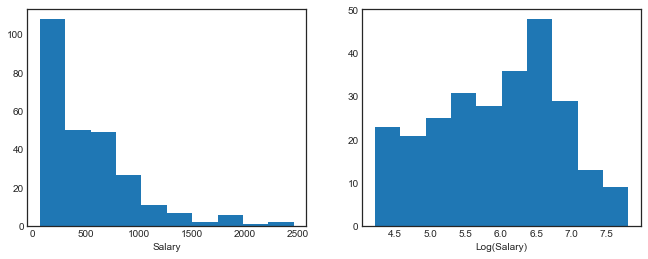

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.values)
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');  # log-tranform Salary so that its distribution has more of a typical bell-shape

In [18]:
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
regr = DecisionTreeRegressor(max_leaf_nodes=3) # Grow a tree with max_leaf_nodes = 3
                                               # 'mse' used to measure the quality of a split
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=3, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Figure 8.1 (p. 304)

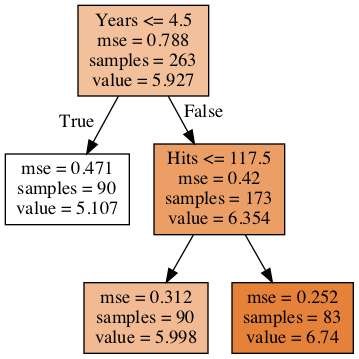

In [19]:
graph = print_tree(regr, features=['Years', 'Hits'])
Image(graph.create_png())

In [20]:
regr2 = DecisionTreeRegressor(max_leaf_nodes=3)
kf_10 = KFold(n_splits=10)
score = -1*cross_val_score(regr2, X, y, cv=kf_10, scoring='neg_mean_squared_error').mean() 
print("MSE: ", score)

('MSE: ', 0.3659491449132214)


### 8.1.2 Classification Trees

Dataset available on http://www-bcf.usc.edu/~gareth/ISL/data.html

In [21]:
df2 = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
#df2.info()

In [22]:
df2.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [23]:
# The decision trees implemented in scikit-learn uses only numerical features and these features are interpreted 
# always as continuous numeric variables. 
dummies = pd.get_dummies(df2[['ChestPain', 'Thal', 'AHD']])
dummies.head()

,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,0,0,0,1,1,0,0,1,0
1,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,1
3,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,1,0


In [24]:
# Define the feature set X and y.
y2 = dummies[['AHD_Yes']]
X_ = df2.drop(['ChestPain', 'Thal', 'AHD'], axis=1).astype('float64')
X2 = pd.concat([X_, dummies[['ChestPain_asymptomatic', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'ChestPain_typical', 'Thal_fixed','Thal_normal', 'Thal_reversable']]], axis=1)

In [25]:
X2.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,0,0,1,1,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,0,0,0,0,1,0
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1,0,0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,1,0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,0,1,0,0,1,0


In [26]:
clf = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0) # If random_state=0 is the seed used by the random number generator
clf.fit(X2,y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=6, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [27]:
clf.score(X2,y2) # Returns the mean accuracy on the given test data and labels: trianing accuracy

0.8484848484848485

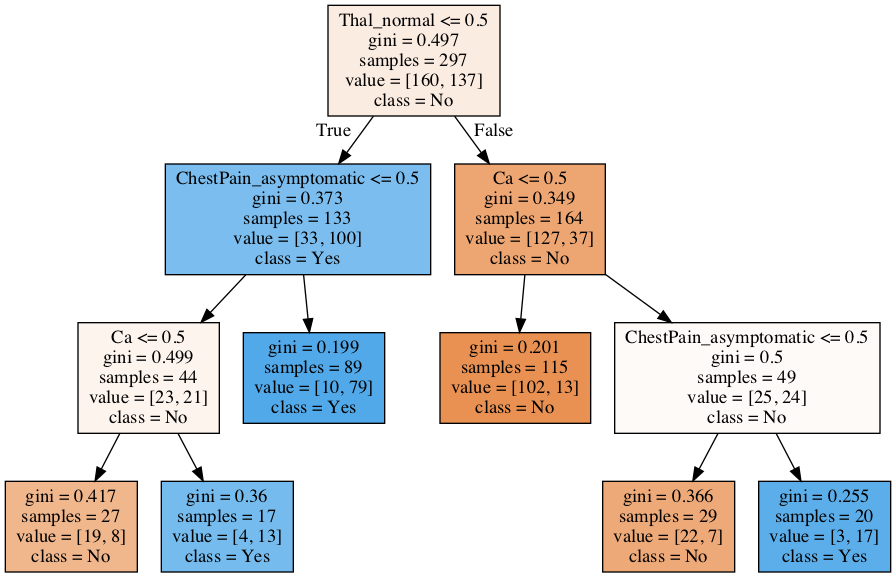

In [28]:
graph2 = print_tree(clf, features=X2.columns, class_names=['No', 'Yes'])
Image(graph2.create_png())

In [29]:
clf2 = DecisionTreeClassifier(max_leaf_nodes=6, random_state=0)
kf_10 = KFold(n_splits=10)
predicted = cross_val_predict(clf2, X2, y2, cv=kf_10, method='predict')
print ("Error Rate: ",1-accuracy_score(y2, predicted), "\n")
print (classification_report(y2, predicted))

('Error Rate: ', 0.2087542087542088, '\n')
             precision    recall  f1-score   support

          0       0.78      0.86      0.82       160
          1       0.81      0.72      0.76       137

avg / total       0.79      0.79      0.79       297



In [30]:
y2 [y2.AHD_Yes==1].shape # the number of class 1 in y2

(137, 1)

## Lab: Decision Trees

### 8.3.1 Fitting Classification Trees

In R, exported the dataset from package 'ISLR' to a csv file.

In [31]:
df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [32]:
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [33]:
dummies = pd.get_dummies(df3[['ShelveLoc', 'Urban', 'US']])
dummies.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0


In [34]:
# Define the feature set X and y.
y = df3.High
X_ = df3.drop(['Sales', 'High', 'ShelveLoc', 'Urban', 'US'], axis=1).astype('float64')
X = pd.concat([X_, dummies[['ShelveLoc_Bad','ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes', 'US_Yes']]], axis=1)

In [35]:
X.head(5)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,138.0,73.0,11.0,276.0,120.0,42.0,17.0,1,0,0,1,1
1,111.0,48.0,16.0,260.0,83.0,65.0,10.0,0,1,0,1,1
2,113.0,35.0,10.0,269.0,80.0,59.0,12.0,0,0,1,1,1
3,117.0,100.0,4.0,466.0,97.0,55.0,14.0,0,0,1,1,1
4,141.0,64.0,3.0,340.0,128.0,38.0,13.0,1,0,0,1,0


In [36]:
# test_size represents the proportion of the dataset to include in the test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [37]:
clf = DecisionTreeClassifier(max_depth=4) # The maximum depth of the tree is set to 4.
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
print(classification_report(y, clf.predict(X)))  # train error

             precision    recall  f1-score   support

          0       0.82      0.93      0.87       236
          1       0.88      0.71      0.78       164

avg / total       0.84      0.84      0.84       400



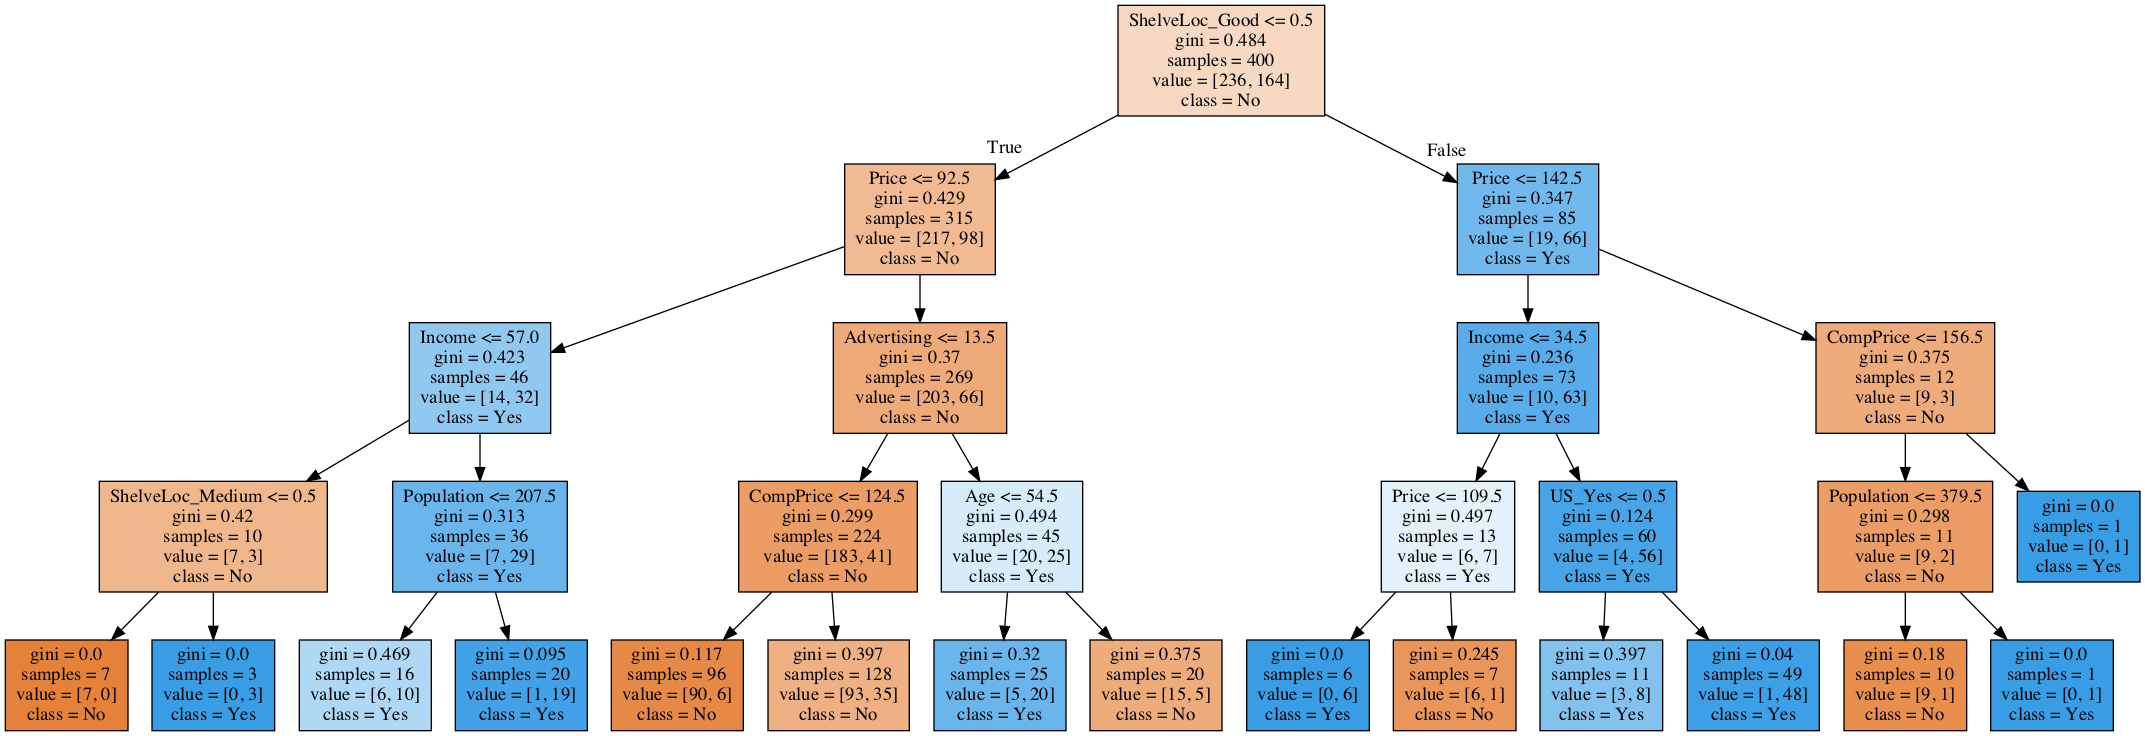

In [39]:
graph3 = print_tree(clf, features=X.columns, class_names=['No', 'Yes'])
Image(graph3.create_png())

In [40]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [41]:
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,99,29
Yes,19,53


In [42]:
# Precision, recall, and f1-score of the model using test data
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.77      0.84      0.80       118
          1       0.74      0.65      0.69        82

avg / total       0.76      0.76      0.76       200



In [43]:
confusion_matrix(y_test, pred)

array([[99, 19],
       [29, 53]])

Pruning not implemented in scikit-learn.

### 8.3.2 Fitting Regression Trees

In R, exported the dataset from package 'MASS' to a csv file.

In [44]:
boston_df = pd.read_csv('Data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [45]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [47]:
# Pruning not supported. Choosing max depth 3)
regr2 = DecisionTreeRegressor(max_depth=3)
regr2.fit(X_train, y_train)
pred = regr2.predict(X_test)

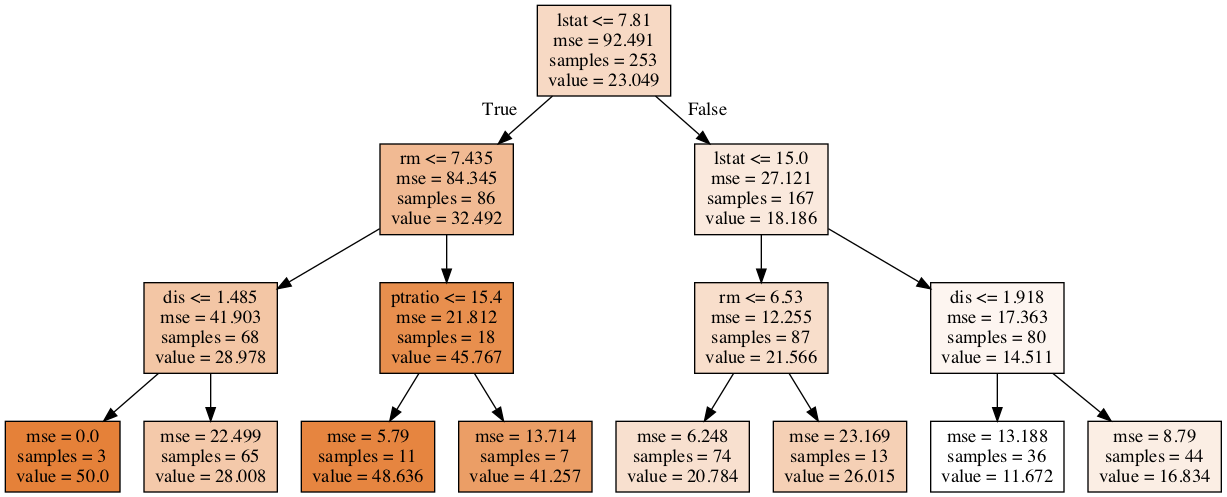

In [48]:
graph = print_tree(regr2, features=X.columns)
Image(graph.create_png())

Text(0,0.5,'y_test')

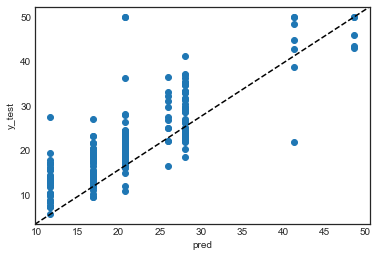

In [49]:
plt.scatter(pred, y_test, label='medv')
# Draw a line that goes from the lower-left corner to the upper-right corner, no matter how you zoom
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [50]:
mean_squared_error(y_test, pred)

26.02323085009744

### 8.3.3 Bagging and Random Forests

In [51]:
# There are 13 features in the Boston dataset
X.shape

(506, 13)

In [52]:
# Bagging: using all features
# n_estimators: The number of trees in the forest.
regr1 = RandomForestRegressor(n_estimators=500, max_features=13, random_state=1)
regr1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=13, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

Text(0,0.5,'y_test')

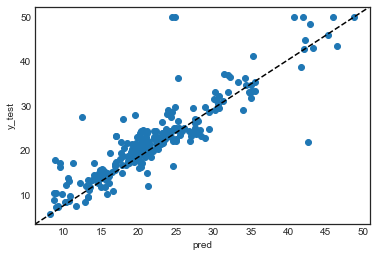

In [53]:
pred = regr1.predict(X_test)

plt.scatter(pred, y_test, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [54]:
mean_squared_error(y_test, pred)

16.007556052648233

In [55]:
# Random forests: using 6 features
regr2 = RandomForestRegressor(n_estimators=500, max_features=6, random_state=1)
regr2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [56]:
pred = regr2.predict(X_test)
mean_squared_error(y_test, pred)

15.658331390039555

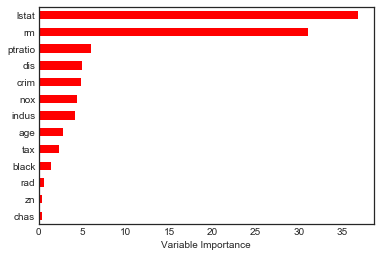

In [57]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [58]:
Importance.sort_values('Importance', axis=0, ascending=True)

,Importance
chas,0.326955
zn,0.417102
rad,0.579018
black,1.369553
tax,2.290990
age,2.734233
indus,4.194304
nox,4.400022
crim,4.890381
dis,5.021207


### 8.3.4 Boosting

In [59]:
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

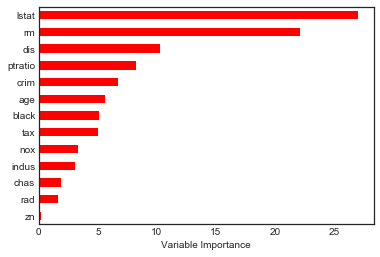

In [60]:
Importance = pd.DataFrame({'Importance':regr.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [61]:
Importance.sort_values('Importance', axis=0, ascending=True)

,Importance
zn,0.170382
rad,1.593909
chas,1.844703
indus,3.045285
nox,3.284683
tax,5.007437
black,5.082208
age,5.587239
crim,6.750284
ptratio,8.226473


In [62]:
mean_squared_error(y_test, regr.predict(X_test))

15.529710264059759